## <i> <span style='color:red'>RANDOM FOREST-FRAUD DATA</i></span>

### PROBLEM STATMENT: Using Random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
df_fraud=pd.read_csv("Fraud_check.csv")
df_fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Checking the basic info from the data
df_fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df_fraud[df_fraud.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [6]:
# Label encoding for categorical values
label_encoder = preprocessing.LabelEncoder()
df_fraud['Undergrad']= label_encoder.fit_transform(df_fraud['Undergrad']) 
df_fraud['Marital.Status']= label_encoder.fit_transform(df_fraud['Marital.Status']) 
df_fraud['Urban']= label_encoder.fit_transform(df_fraud['Urban']) 

In [7]:
# To check  among the income  which are  highly succesptable to riskier accounts by taking the average taxable income 30000 as a priority
df_fraud["Taxable.Income"]=(df_fraud["Taxable.Income"]>30000)*1

In [8]:
### splitting the dependent and target variables from the dataset
x=df_fraud.drop(axis=0,columns="Taxable.Income")
y=df_fraud["Taxable.Income"]

In [9]:
df_fraud["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

###  Splitting the data for training and testing

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

###  Random forest classfier

In [11]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [12]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

### Model prediction - train data

In [13]:
Y_pred=model.predict(x_train)

In [14]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


### Train accuracy

In [15]:
model.score(x_train, y_train)

1.0

### Model prediction - test data

In [16]:
y_pred=model.predict(x_test)

In [17]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7222222222222222


### Test accuracy

In [18]:
model.score(x_test, y_test)

0.7222222222222222

### Checking the important features among the data

In [19]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.527353
Work.Experience    0.288510
Marital.Status     0.084314
Urban              0.050385
Undergrad          0.049437
dtype: float64

### Visualization of important features 

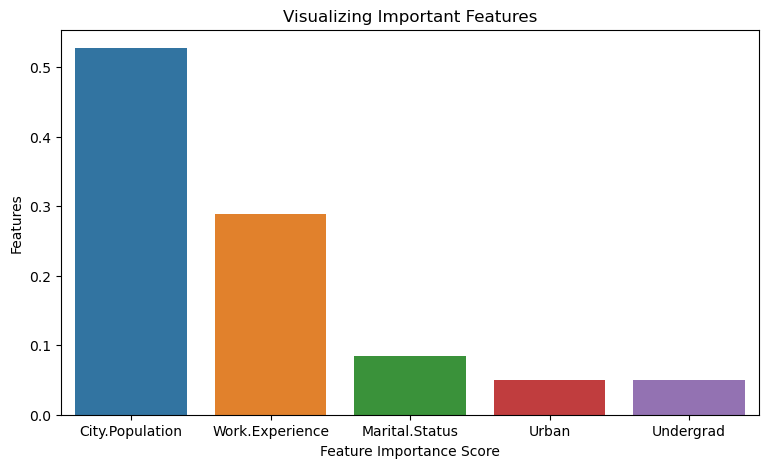

In [20]:
plt.figure(figsize=(9,5))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### checking model  with different maximum features using loop function

In [21]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

### plotting the training and testing accuracy with different maximum features

In [22]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.722222
1,2,1.0,0.716667
2,3,1.0,0.711111
3,4,1.0,0.716667
4,5,1.0,0.722222
5,6,1.0,0.705556
6,7,1.0,0.716667
7,8,1.0,0.727778
8,9,1.0,0.727778


### Visualization 

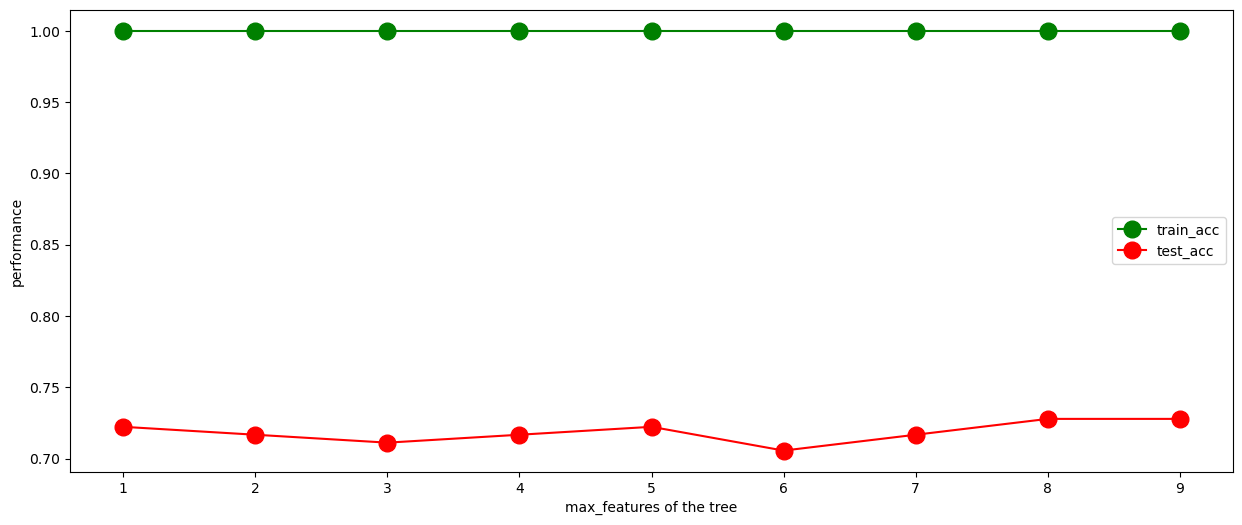

In [23]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o',markersize=12,color='green')
plt.plot(data['max_features'], data['test_acc'], marker = 'o',markersize=12, color='red')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

### Confusion matrix

In [24]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  2,  37],
       [ 13, 128]], dtype=int64)

### Visualization of confusion matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7277777777777777')

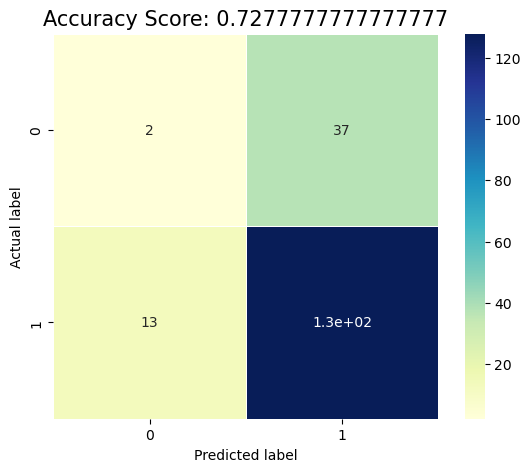

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Classification report for the test data

In [26]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.19      0.08      0.11        39
           1       0.78      0.91      0.84       141

    accuracy                           0.73       180
   macro avg       0.48      0.49      0.47       180
weighted avg       0.65      0.73      0.68       180



### KFold validation for model validation

In [28]:
kfold=KFold(n_splits=8)

In [29]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.74


### Adaboost classifier -To check the fraud check using k fold

In [32]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)

### Checking the accuracy  in Adaboost

In [33]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7916666666666666


###  checking the accuracy in train test split 

In [34]:
model.fit(x_train,y_train)
print("accuracy:",model.score(x_train, y_train))

accuracy: 0.8023809523809524


### Model prediction - test data

In [35]:
y_pred=model.predict(x_test)

In [36]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7722222222222223


### Listing the accuracy of training and testing

In [37]:
data

,max_features,train_acc,test_acc
0,1,1.0,0.722222
1,2,1.0,0.716667
2,3,1.0,0.711111
3,4,1.0,0.716667
4,5,1.0,0.722222
5,6,1.0,0.705556
6,7,1.0,0.716667
7,8,1.0,0.727778
8,9,1.0,0.727778


## Inference:
### From the above observations we can clearly see that 77.66% of accuracy in maximum feature as 4 and also in the adabooster it also shows an higher accuracy as 77.22% in maximum feature 3.
